In [372]:
!pip install -U airportsdata

In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import airportsdata
airports = airportsdata.load('IATA')  # key is the IATA location code

In [374]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 0: Import the Dataset

In [375]:
df = pd.read_csv("/content/drive/MyDrive/BritishAirwaysProject_v2/airline_review.csv")
df.head()

,Unnamed: 0,rating,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,I take comfort in reading the last ten or so...,NaN,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified


## Data Preprocessing

Remove irrelevant columns and values to streamline the dataset for analysis.

Steps Taken:
*   Removal of Unnamed: 0 Column
  *   Rationale: This column appears to be an index or artifact from the data source and does not contain meaningful information for the analysis.
Method: The column will be dropped from the dataset to reduce redundancy.

*   Filtering Out -1 Values
  *   Rationale: The -1 values in the dataset do not represent relevant information or actionable data. These values will be filtered out or replaced to ensure data quality and prevent misleading results in analysis.
Method: Rows or columns containing -1 values will be handled accordingly, either by removing the rows entirely or imputing meaningful values if applicable.









In [376]:
df.drop(df.columns[0],axis = 1, inplace=True)
df.replace(-1,np.nan,inplace=True)
df

,rating,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2.0,3.0,1.0,2.0,2.0,no,NaN,Not Verified
1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2.0,1.0,2.0,1.0,1.0,no,NaN,Verified
2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2.0,3.0,2.0,1.0,1.0,no,NaN,Not Verified
3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,2023-10-01,4.0,4.0,2.0,1.0,1.0,no,NaN,Verified
4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,I take comfort in reading the last ten or so...,NaN,Couple Leisure,Business Class,Athens to London,2023-09-01,1.0,1.0,1.0,1.0,1.0,no,1.0,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,2,British Airways customer review,G Pardoe,2014-05-03,United Kingdom,Las Vegas-LGW 777 3 class. Business. The uniqu...,NaN,NaN,Economy Class,NaN,NaN,5.0,5.0,5.0,NaN,4.0,yes,NaN,NaN
3612,8,British Airways customer review,Guy Senior,2014-04-30,United Kingdom,An interesting contrast on recent Gatwick to T...,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,3.0,NaN,3.0,no,4.0,NaN
3613,8,British Airways customer review,Jack Hughes,2012-08-30,United Kingdom,Heathrow Marrakech. Had previously travelled o...,NaN,NaN,Business Class,NaN,NaN,4.0,3.0,2.0,NaN,2.0,no,3.0,NaN
3614,6,British Airways customer review,W Benson,2012-08-29,United Kingdom,HKG-LHR in New Club World on Boeing 777-300 - ...,NaN,NaN,Economy Class,NaN,NaN,3.0,1.0,2.0,NaN,3.0,no,NaN,NaN


# Step 1: Check for Missing Values

To ensure the dataset is complete, I started by identifying any missing
(incomplete) values in each column. Using the .isnull() method, I checked each cell for missing data and summed up the results for each column.


In [377]:
missing_values = df.isnull().sum()
missing_values

,0
rating,0
header,0
author,0
date,0
place,0
content,0
aircraft,1714
traveller_type,721
seat_type,2
route,725


# Step 2: Investigating the Source of Missing Data
After identifying missing values in the dataset, I explored the website from which the data was retrieved to understand the data entry process. Through this investigation, I observed that the form requires users to fill in every field. However, some fields such as Food & Beverages and Inflight Entertainment could be marked as “N/A” if not applicable.

Despite the required nature of many fields, I found that several columns, including Type of Traveller, Route, and Date Flown, contained missing (NaN) values. Based on these findings, I made the following observations:

*   User Input Error or Data Transfer Issue: Some fields might not have been captured correctly by the website, or users made errors during submission.
*   Legitimate Missing Values: Columns such as Food & Beverages and Inflight Entertainment contain missing values because users may have selected "N/A" for these options.

Steps Taken:

*   Initial Identification of Missing Values
  *   Using an initial analysis with the isnull() function, I identified the presence and extent of missing values across all columns in the dataset. This helped highlight specific fields with incomplete data.


*   Website Verification
  *   I reviewed the source website to confirm whether certain fields should contain complete data. This check revealed that some fields expected to be fully populated still appeared as NaN in the dataset.

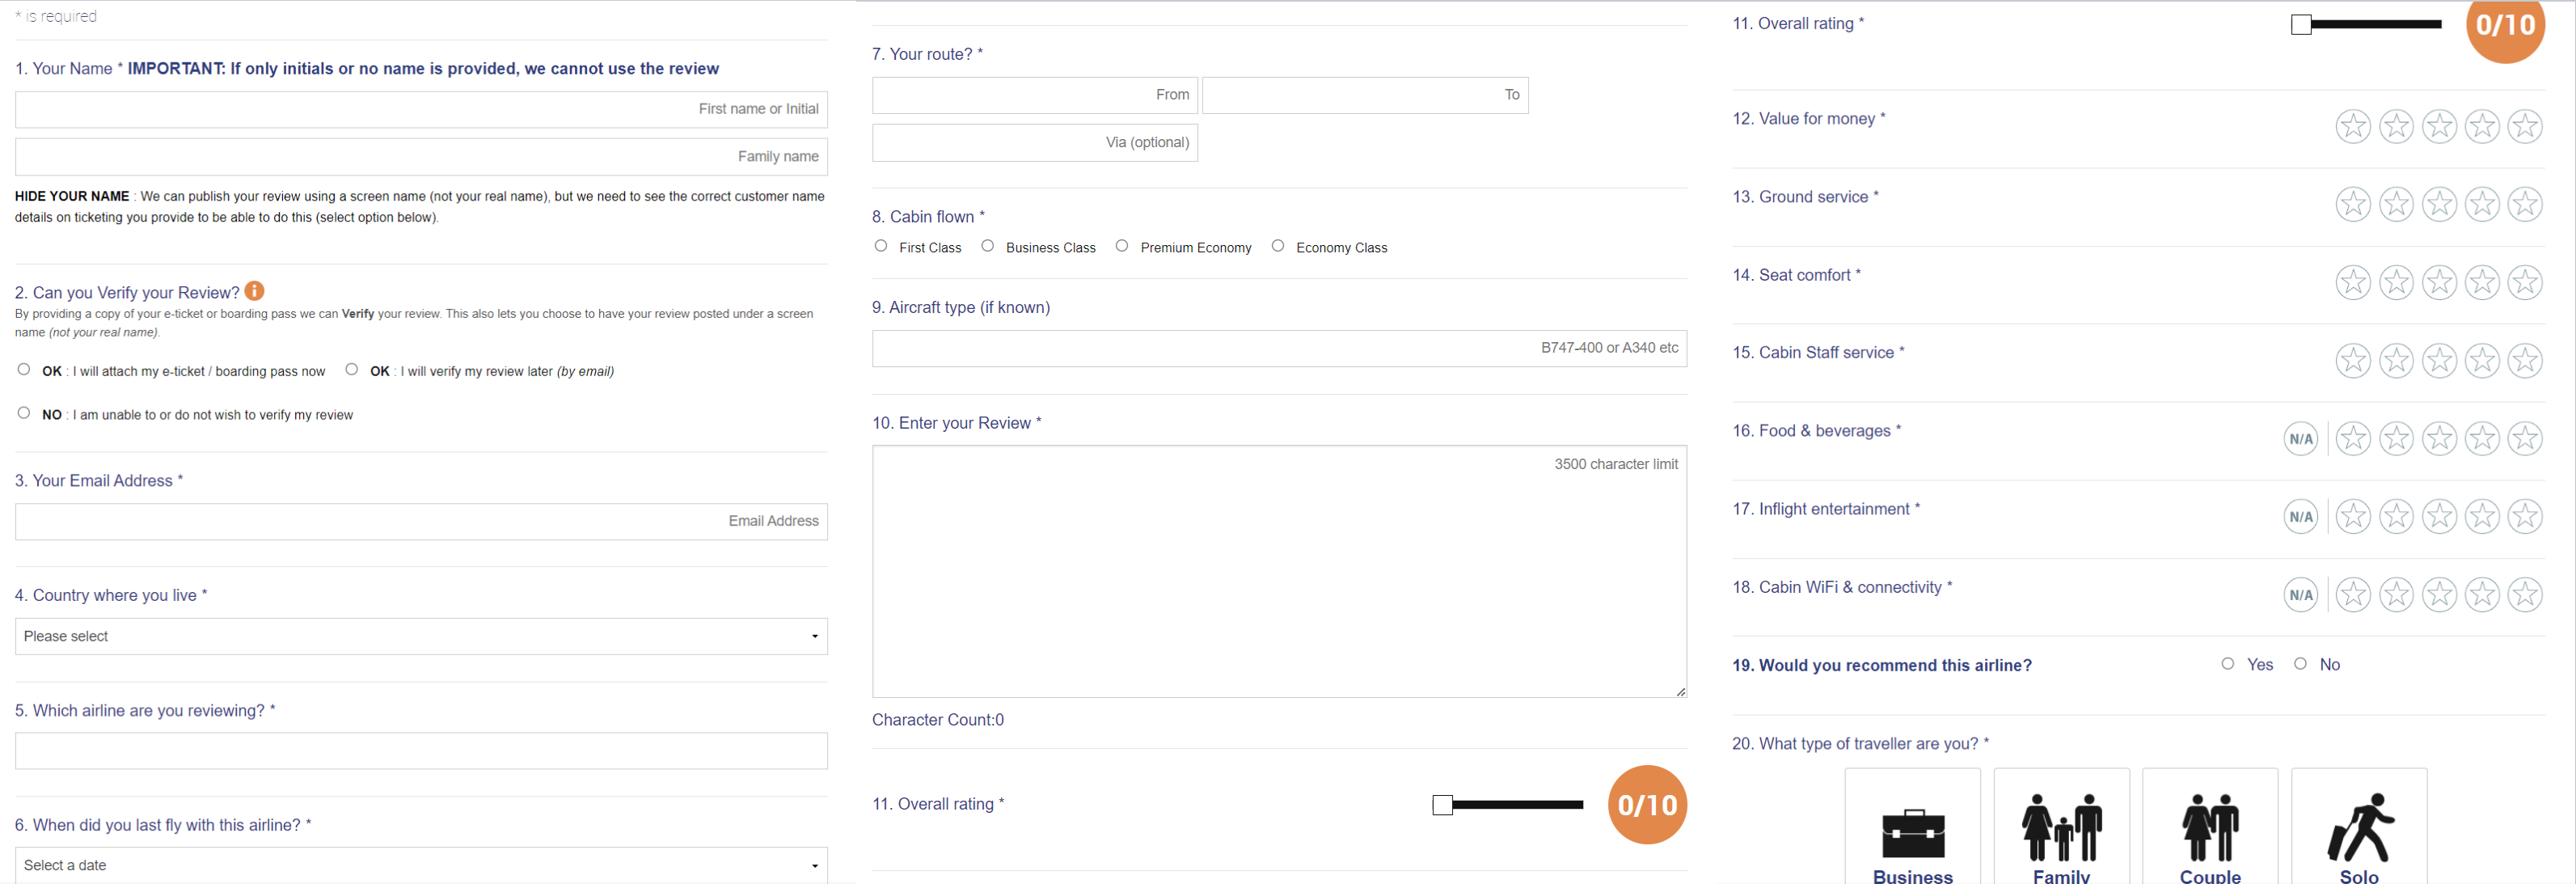



*   Elimination of Rows with Essential Missing Values
  *   Columns deemed critical for the analysis, where NaN values are unacceptable, were identified. Rows containing missing data in these essential columns were subsequently removed to maintain dataset integrity and reliability for further analysis.







# Step 3: Identify Rows with Critical Fields Missing

We need to check for rows where any of the critical columns (Aircraft, Type of Traveller, Seat Type, Route, Date Flown) contain missing values.

Code Explanation: To identify and then remove these rows, we’ll use the .dropna() function, specifying the subset of critical columns.

Here’s the code to check for missing values in those columns and remove the rows:

In [378]:
critical_colums = ["traveller_type","seat_type","route","date_flown","seat_comfort","cabin_staff_service","ground_service","value_for_money"]
updated_data = df.dropna(subset=critical_colums)
updated_data.isnull().sum()

,0
rating,0
header,0
author,0
date,0
place,0
content,0
aircraft,876
traveller_type,0
seat_type,0
route,0


In [379]:
updated_data.head()

,rating,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2.0,3.0,1.0,2.0,2.0,no,NaN,Not Verified
1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2.0,1.0,2.0,1.0,1.0,no,NaN,Verified
2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2.0,3.0,2.0,1.0,1.0,no,NaN,Not Verified
3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,2023-10-01,4.0,4.0,2.0,1.0,1.0,no,NaN,Verified
4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,I take comfort in reading the last ten or so...,NaN,Couple Leisure,Business Class,Athens to London,2023-09-01,1.0,1.0,1.0,1.0,1.0,no,1.0,Verified


# Step 4: Verifying Data Types

After handling NaN values, the next step is to ensure that the data types of the columns remain consistent. This is important because the process of filling missing values can sometimes change the type of the data (for example, converting numerical columns into object types). To verify that all columns have the correct data types, I used the .info() function.

In [380]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2753 entries, 0 to 2884
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rating               2753 non-null   int64  
 1   header               2753 non-null   object 
 2   author               2753 non-null   object 
 3   date                 2753 non-null   object 
 4   place                2753 non-null   object 
 5   content              2753 non-null   object 
 6   aircraft             1877 non-null   object 
 7   traveller_type       2753 non-null   object 
 8   seat_type            2753 non-null   object 
 9   route                2753 non-null   object 
 10  date_flown           2753 non-null   object 
 11  seat_comfort         2753 non-null   float64
 12  cabin_staff_service  2753 non-null   float64
 13  food_beverages       2500 non-null   float64
 14  ground_service       2753 non-null   float64
 15  value_for_money      2753 non-null   float6

After verifying the data types of each column, I noticed a few fields that required further adjustments to ensure consistency and proper formatting:

**Date & Date Flown**

Initially, those columns was stored as an object. To maintain consistency across all numerical columns, I converted "date" to datetime64.


In [381]:
updated_data['date'] = pd.to_datetime(updated_data['date'], format='%Y-%m-%d')
updated_data['date_flown']=pd.to_datetime(updated_data['date_flown'], format='%Y-%m-%d')

<ipython-input-381-279a9ae18810>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data['date'] = pd.to_datetime(updated_data['date'], format='%Y-%m-%d')
<ipython-input-381-279a9ae18810>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data['date_flown']=pd.to_datetime(updated_data['date_flown'], format='%Y-%m-%d')




---
**Recommended & Trip Verified:**

The Recommended column, which originally had values like "yes" and "no", was stored as an object (object). Since this field represents a binary decision, I converted it into a boolean (True/False) format for more efficient processing.

However, the Trip Verified column was not converted to boolean due to the presence of NaN (missing) values. Removing these NaN entries could lead to inconsistency in the dataset, as it might discard relevant records. Keeping Trip Verified as-is allows us to retain all entries, ensuring that no data is lost in the process.

In [382]:
updated_data['recommended']= updated_data['recommended'].map({'yes':True,'no':False})
updated_data.iloc[:,16]

<ipython-input-382-9a3004877ae1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data['recommended']= updated_data['recommended'].map({'yes':True,'no':False})


,recommended
0,False
1,False
2,False
3,False
4,False
...,...
2880,True
2881,True
2882,True
2883,True


**Traveller Type & Seat Type**

The traveller_type and seat_type initially stored as object types, were converted to category types. This change optimizes memory usage and improves processing speed by compactly storing repetitive categorical values without altering the data itself.

In [383]:
category_columns = ['traveller_type', 'seat_type']
updated_data[category_columns] = updated_data[category_columns].astype('category')

<ipython-input-383-58752a8f8cf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data[category_columns] = updated_data[category_columns].astype('category')




---


**Re-verified Data Types:**

After applying these conversions, I re-checked the data types using .info() to confirm the changes were applied correctly.

In [384]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2753 entries, 0 to 2884
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rating               2753 non-null   int64         
 1   header               2753 non-null   object        
 2   author               2753 non-null   object        
 3   date                 2753 non-null   datetime64[ns]
 4   place                2753 non-null   object        
 5   content              2753 non-null   object        
 6   aircraft             1877 non-null   object        
 7   traveller_type       2753 non-null   category      
 8   seat_type            2753 non-null   category      
 9   route                2753 non-null   object        
 10  date_flown           2753 non-null   datetime64[ns]
 11  seat_comfort         2753 non-null   float64       
 12  cabin_staff_service  2753 non-null   float64       
 13  food_beverages       2500 non-null   f

# Step 5: Check for Duplicates

To ensure the dataset is clean and free from redundant data, I checked for duplicate rows. Duplicate rows could distort the analysis by over-representing certain data points. Here's how I identified and removed them.

Steps Taken:

Identified Duplicate Rows: I used the .duplicated() function to identify rows where all the columns had identical values.

In [385]:
duplicates = updated_data.duplicated()
print(f"Number of duplicated row: {duplicates.sum()}")

Number of duplicated row: 0


Since there is no duplicated rows, we will move with data validation and consistency checks

# Step 6: Final Data Validation & Consistency Checks

## Removing the routes contains "via"
As part of the final validation, I identified rows where the Route column contained the word "via." The reason for this is that rows with "via" in the route description (e.g., "Montreal to Edinburgh via London Heathrow") are ambiguous because they don't clearly specify which flight the passenger gave the ratings for—whether it’s the first leg, the second leg, or the entire journey.

Action Taken:

I chose to remove these rows to maintain data clarity and ensure that the ratings reflect only one segment of a flight, rather than a combination of multiple segments.

In [386]:
via_rows = updated_data[updated_data['route'].str.contains('via', case=False, na=False)]
via_rows

,rating,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2.0,3.0,1.0,2.0,2.0,False,NaN,Not Verified
5,3,The worst journey in my life,Massimo Garavaglia,2023-09-30,Italy,The worst journey in my life. The connection...,NaN,Business,Economy Class,Milan to San Jose via London,2023-09-01,3.0,3.0,2.0,1.0,1.0,False,4.0,Verified
6,4,Very disappointed,Tom Slowbe,2023-09-28,United States,"The airplanes and the lounges are worn out, o...",777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,2023-09-01,1.0,4.0,4.0,3.0,2.0,False,3.0,Verified
9,1,"never fly this awful airline again""",P Cooper,2023-09-23,United States,"I had a flight from Miami, Florida to Dublin,...",NaN,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,2023-08-01,1.0,3.0,2.0,1.0,1.0,False,1.0,Verified
10,1,I’ll never fly with them again,Bruce Friedman,2023-09-22,United States,We started our day with BA in Prague. The fl...,NaN,Business,Business Class,Prague to San Francisco via London,2023-09-01,1.0,3.0,3.0,1.0,1.0,False,NaN,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,2,British Airways customer review,John Duffus,2015-07-03,Thailand,"Returning from Chicago to Berlin, the overall ...",B777-300 / A319,Solo Leisure,Economy Class,Chicago to Berlin via London Heathrow,2015-06-01,1.0,2.0,1.0,1.0,1.0,False,3.0,NaN
2857,8,British Airways customer review,Felix Maltchinski,2015-06-30,Canada,YUL to FCO and BCN to YUL. PTV on each for e l...,Boeing 777-200,Family Leisure,Economy Class,YUL to FCO via LHR,2014-10-01,4.0,4.0,3.0,4.0,5.0,True,3.0,NaN
2859,2,British Airways customer review,John Duffus,2015-06-28,Thailand,Check in at Tegel was a disaster and ludicrous...,A320 / Boeing 777-300,Solo Leisure,Economy Class,Berlin to Chicago via LHR,2015-06-01,1.0,3.0,2.0,1.0,1.0,False,3.0,NaN
2863,3,British Airways customer review,John Gray,2015-06-26,United Kingdom,It appears BA continues to adopt a “do as litt...,Boeing 767,Couple Leisure,Business Class,LHR to Grand Cayman via Nassau,2015-06-01,2.0,5.0,2.0,2.0,2.0,False,2.0,NaN


### Dropping Rows with "via" in the Route

In this step, I aimed to remove all rows from the updated_data DataFrame where the Route column contained the word "via." These rows were dropped because the ambiguity introduced by the "via" keyword (e.g., "Montreal to Edinburgh via London Heathrow") made it unclear which segment of the flight the passenger was rating. To ensure data accuracy, it was essential to remove these rows.

Steps Taken:
*   Extracted Indexes: I used the .index of the via_rows DataFrame to get a list of indexes where "via" appeared in the Route.
*   Dropped the Rows: I used .drop() to remove these rows from the updated_data DataFrame.






In [387]:
via_index = via_rows.index.tolist()
updated_data.drop(via_index,inplace=True)

<ipython-input-387-6181ddc57c69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data.drop(via_index,inplace=True)


In [388]:
updated_data.shape

(2272, 19)

In [389]:
updated_data = updated_data.reset_index(drop=True)

## Splitting the Route into Departure and Destination Cities

In this step, I created a function to split the 'route' column into two parts: Departure and Destination. The goal was to extract the cities involved in the route and store them in separate columns for easier analysis.

I standardized route formats by splitting entries written as "City1 to City2" using " to " as the delimiter, ensuring consistency across all route data.

Steps Taken:

1.   Created a Custom Function:
    *   I defined a function called conditional_split() to handle different route formats and split the route string accordingly.
2.   Applied the Function:
  *   I applied this function to the Route column to generate a list of the departure and destination cities for each route.
3.   Added Columns:
  *   I inserted two new columns, Departure and Destination, into the main_data DataFrame to store the split values.
4.   Reset Index:
  *   To maintain a clean and orderly DataFrame, I reset the index to ensure proper row alignment after adding the new columns.

In [390]:
def conditional_split(string):
  if " to " in string:
    return string.split(' to ')
  elif "-" in string:
    return string.split('-')
  else:
    return [string]

initial_list=list(updated_data['route'].apply(conditional_split))


In [391]:
len(initial_list)

2272

In [392]:
# Check for entries with less than two items in initial_list
for i, item in enumerate(initial_list):
    if len(item) < 2:
        print(f"Row {i} has less than two items: {item}")
    elif len(item) > 2:
      print(f"Row {i} has more than two items: {item}")

Row 129 has less than two items: ['London Singapore ']
Row 463 has more than two items: ['doha', 'londonDoha', 'London']
Row 700 has more than two items: ['Bucharest', 'London Heathrow', 'Los Angeles']
Row 1657 has more than two items: ['LHR', 'BOS, SEA', 'LHR']


In [393]:
updated_data.insert(10,"departure","")
updated_data.insert(11,"destination","")

In [394]:
# Step 1: Identify and drop irregular rows
irregular_rows = [i for i, item in enumerate(initial_list) if len(item) != 2]
irregular_rows

[129, 463, 700, 1657]

In [395]:
updated_data.drop(updated_data.index[irregular_rows], inplace=True)

In [396]:
updated_data.shape

(2268, 21)

In [397]:
updated_data = updated_data.reset_index(drop=True)

In [398]:
initial_list=list(updated_data['route'].apply(conditional_split))

In [399]:
# Check for entries with less than two items in initial_list again
for i, item in enumerate(initial_list):
    if len(item) < 2:
        print(f"Row {i} has less than two items: {item}")
    elif len(item) > 2:
      print(f"Row {i} has more than two items: {item}")

In [400]:
len(initial_list)

2268

### **Filling Departure and Destination Columns & Creating Lists**

After splitting the 'route' column into Departure and Destination, I populated these new columns with the extracted city names from the initial_list. In the dataset, however, some entries contained IATA airport codes rather than city names. To address this issue, I created two separate lists (departure_list and destination_list) for easier manipulation and handling of IATA codes.

**Steps Taken:**


1.   Filled the Departure and Destination Columns:
  *   I looped through the initial_list (which contained the split values from the route column) and assigned the first value to the Departure column and the second value to the Destination column.

2.   Created Lists for Further Processing:
  *   I then created two lists, departure_list and destination_list, to store the values from the Departure and Destination columns. This allowed me to handle cases where the dataset contained IATA codes instead of city names more efficiently in the following steps.

Outcome:
*   The Departure and Destination columns were successfully populated with the city names (or IATA codes) extracted from the Route column.
*   Two lists, departure_list and destination_list, were created to handle further code processing where IATA codes needed to be mapped or replaced.

In [401]:
for i in range(len(initial_list)):
  updated_data["departure"][i] = initial_list[i][0]
  updated_data["destination"][i] = initial_list[i][1]

<ipython-input-401-895fed8b5fab>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  updated_data["departure"][i] = initial_list[i][0]
<ipython-input-401-895fed8b5fab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [402]:
updated_data.iloc[:,9:12]

,route,departure,destination
0,London Heathrow to Munich,London Heathrow,Munich
1,Heathrow to Istanbul,Heathrow,Istanbul
2,London to Geneva,London,Geneva
3,Athens to London,Athens,London
4,London to Seville,London,Seville
...,...,...,...
2263,London to Turkey,London,Turkey
2264,Abu Dhabi to Muscat,Abu Dhabi,Muscat
2265,LHR to YYZ,LHR,YYZ
2266,LGW to VCE,LGW,VCE


## **Replacing IATA Codes with City Names**

In this step, I replaced the IATA airport codes found in the Departure and Destination columns with the corresponding city names. To achieve this, I utilized a pre-existing dictionary, airports, which maps IATA codes to city names.

**Steps Taken:**


1.   Loaded the Airports Data:
  *   I loaded the airport data, ensuring that each IATA code was correctly mapped to its corresponding city name. This data was structured as a dictionary, with the IATA codes as keys and their respective city names as values.
2.   Created a Function to Replace IATA Codes:
  *  I created the airport_to_city() function that checks whether a value (in the Departure and Destination columns) exists as an IATA code in the airports dictionary. If the value exists, it is replaced with the corresponding city name. Otherwise, the original value is retained.

In [403]:
def airport_to_city(string):
  if string in airports.keys():
    return airports[string]['city']
  else:
    return string

In [404]:
updated_data["departure"] = updated_data["departure"].apply(airport_to_city)
updated_data["destination"] = updated_data["destination"].apply(airport_to_city)

In [405]:
updated_data.iloc[-3:,9:12]

,route,departure,destination
2265,LHR to YYZ,London,Mississauga
2266,LGW to VCE,London,Venezia
2267,LHR to SOF,London,Sofia


## **Using a Dataset for City and Country Names**

In [406]:
worldcities = pd.read_csv("/content/drive/MyDrive/BritishAirwaysProject_v2/worldcities.csv")
countries = pd.read_csv("/content/drive/MyDrive/BritishAirwaysProject_v2/Countries.csv")

In [407]:
worldcities = worldcities['city_ascii'].dropna().tolist()
countries = countries['Country'].dropna().tolist()

## Fixing City and Country Names

In this step, I standardized the city names found in the Departure and Destination columns by using a reference list of verified city and country names. This helped ensure data consistency across the dataset.

**Steps Taken:**

*   Loaded City and Country Reference Data: I loaded trusted datasets for cities and countries, each containing standardized names. This reference data provided the basis for validating the names in the Departure and Destination columns.
*   Trimmed Extra Spaces: I removed any leading or trailing spaces from the values in the Departure and Destination columns. This simple step ensured that entries with accidental spaces were not flagged as outliers.

*   Extracted Unique Values for Review: I retrieved the unique values from both the Departure and Destination columns. This allowed me to see each distinct entry and identify any inconsistencies or non-standard names (like "London Heathrow" instead of "London").

*   Compared Values Against Trusted Lists: I converted the trusted city and country names into sets for faster lookups. I then compared each unique entry from the Departure and Destination columns to these sets. Values that didn’t match the trusted lists were flagged as outliers.

*   Compiled Outliers for Replacement: Any non-standard names that were identified as outliers (e.g., "London Heathrow") were collected into a list, highlighting entries needing correction.
*   Created a Replacement Dictionary: I constructed a dictionary where each outlier (e.g., "London Heathrow", "Heathrow") was mapped to the correct city name (e.g., "London"). This dictionary streamlined the replacement process and ensured each non-standard entry was replaced with its standardized counterpart.

*   Applied the Dictionary for Standardization: Using the replace function with the dictionary, I updated the Departure and Destination columns to reflect the correct city names, ensuring that all entries were consistent with the trusted reference lists.



















This process established a clean, standardized set of city names, enhancing data quality for future analysis.

In [408]:
# Remove leading and trailing spaces in the Departure and Destination columns
updated_data['departure'] = updated_data['departure'].str.strip()
updated_data['destination'] = updated_data['destination'].str.strip()

In [409]:
unique_departure = updated_data['departure'].unique()
unique_destination = updated_data['destination'].unique()

In [410]:
# Convert worldcities and countries to sets for fast lookups
trusted_cities = set(worldcities)
trusted_countries = set(countries)

In [411]:
# Initialize an outliers list to store unmatched values
outliers = []

In [412]:
# Check for unmatched values in the unique departure list
for value in unique_departure:
    if value not in trusted_cities and value not in trusted_countries:
        outliers.append(value)

In [413]:
# Check for unmatched values in the unique destination list
for value in unique_destination:
    if value not in trusted_cities and value not in trusted_countries:
        outliers.append(value)

In [414]:
# Display the outliers
outliers

['London Heathrow',
 'Heathrow',
 'Gatwick',
 'Rhodes',
 'London City Airport',
 'London City',
 'Santorini',
 'New York JFK',
 'London Gatwick',
 'Amman Jordan',
 'Tel Aviv',
 'Dallas Ft Worth',
 'Paris CDG',
 'Washington Dulles',
 'London-Heathrow',
 'Orlando, Florida',
 'Rio De Janeiro',
 'Cephalonia',
 'Palma de Mallorca',
 'Mykonos',
 'Johannesburg OR Tambo',
 'Rome Fiumicino',
 'St Lucia',
 'Tokyo Narita',
 'Leeds Bradford',
 'St Petersburg',
 'Heraklion',
 'Seville',
 'São Paulo',
 'Edimbourgh',
 'Rio de Janiero',
 'San Jose, CA',
 'Berlin Tegel',
 'Seoul Incheon',
 'Düsseldorf',
 'Tokyo Haneda',
 'Grand Cayman',
 'Zakinthos',
 'Belfast City',
 'Corfu',
 'Manchester, UK',
 'Zürich',
 'London LGW',
 'Punta Cana',
 'Fuerteventura Island',
 'Dallas-Fort Worth',
 'Larnarca',
 'UVF',
 'Palma De Mallorca',
 'Napoli',
 'Frankfurt am Main',
 'Bale/Mulhouse',
 'Torino',
 'Venezia',
 'LHR - EDI',
 'iAH',
 'Sharm el-Sheikh',
 'Heathrow (London)',
 'Fuereventura',
 'lgw',
 'Istambul',
 'Van

In [415]:
replacement_dict = {
    # London and variations
    "London Heathrow": "London",
    "Heathrow": "London",
    "Gatwick": "London",
    "London City Airport": "London",
    "London City": "London",
    "London Gatwick": "London",
    "London-Heathrow": "London",
    "London LGW": "London",
    "Heathrow (London)": "London",
    "lgw": "London",
    "London UK (Heathrow)": "London",
    "London Heaathrow": "London",
    "LHR": "London",
    "London LHR": "London",

    # New York and variations
    "New York JFK": "New York",
    "JFK (New York City)": "New York",
    "JFK": "New York",

    # Paris and variations
    "Paris CDG": "Paris",
    "Paris Orly": "Paris",

    # Rome and variations
    "Rome Fiumicino": "Rome",
    "Rome FCO": "Rome",

    # Tokyo and variations
    "Tokyo Narita": "Tokyo",
    "Tokyo Haneda": "Tokyo",
    "Haneda": "Tokyo",

    # Dallas and variations
    "Dallas Ft Worth": "Dallas",
    "Dallas-Fort Worth": "Dallas",
    "DFW": "Dallas",

    # Rio de Janeiro and variations
    "Rio De Janeiro": "Rio de Janeiro",
    "Rio de Janiero": "Rio de Janeiro",

    # Washington and variations
    "Washington Dulles": "Washington",
    "Washington DC": "Washington",
    "IAD": "Washington",

    # San Francisco and variations
    "San Francisco": "San Francisco",
    "san Francisco": "San Francisco",

    # Athens and variations
    "Athens Greece": "Athens",

    # Abu Dhabi and variations
    "Abu Dhabi": "Abu Dhabi",

    # Amsterdam and variations
    "AMS": "Amsterdam",

    # Bengaluru and variations
    "Bengaluru": "Bangalore",

    # Zurich and variations
    "Zürich": "Zurich",

    # Kuala Lumpur and variations
    "Kuala lumpur": "Kuala Lumpur",

    # Düsseldorf and variations
    "Duesseldorf": "Düsseldorf",

    # Singapore and variations
    "Singapire": "Singapore",

    # Los Angeles and variations
    "Los Angesles": "Los Angeles",

    # Other standardizations
    "St Lucia": "Saint Lucia",
    "Saint Petersburg": "St. Petersburg",
    "São Paulo": "Sao Paulo",
    "Napoli": "Naples",
    "Palma de Mallorca": "Palma",
    "Cephalonia": "Kefalonia",
    "Malé": "Male",
    "Billund, Denmark": "Billund",
    "Stockholm Arlanda": "Stockholm",
    "Arlanda Stockholm": "Stockholm",
    "Kos Island": "Kos",
    "Zakinthos": "Zakynthos",
    "UVF": "Saint Lucia",
    "Tampa International": "Tampa",
    "Castletown": "Isle of Man",
    "SSH": "Sharm el-Sheikh",
    "Larnarca": "Larnaca",
    "Larnaca Cyprus": "Larnaca",
    "Firenze": "Florence",
    "Bale/Mulhouse": "Basel",
    "SYD": "Sydney",
    "MIa": "Miami",
    "Accra, Ghana": "Accra",
    "Abuja Nigeria": "Abuja",
    "Edimbourgh": "Edinburgh",
    "Thira": "Santorini",
    "Punta Cana": "Punta Cana",
    "Ezeiza": "Buenos Aires",
    "Vencouver Canada": "Vencouver",
    "Manchester, UK": "Manchester"
}


In [416]:
updated_data['departure'] = updated_data['departure'].replace(replacement_dict)
updated_data['destination'] = updated_data['destination'].replace(replacement_dict)

In [417]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rating               2268 non-null   int64         
 1   header               2268 non-null   object        
 2   author               2268 non-null   object        
 3   date                 2268 non-null   datetime64[ns]
 4   place                2268 non-null   object        
 5   content              2268 non-null   object        
 6   aircraft             1598 non-null   object        
 7   traveller_type       2268 non-null   category      
 8   seat_type            2268 non-null   category      
 9   route                2268 non-null   object        
 10  departure            2268 non-null   object        
 11  destination          2268 non-null   object        
 12  date_flown           2268 non-null   datetime64[ns]
 13  seat_comfort         2268 non-nul

### Handling the Date Flown Column


To improve the analysis of flight dates, I separated the date information into distinct Year and Month columns. This makes it easier to analyze flight data trends based on either the month or the year.

**Steps Taken:**


*   **Extracted Year and Month Values:** I used the .dt.year and .dt.month attributes from the date_flown column to extract year and month information separately, storing them as lists (year_list and month_list).

*   **Inserted New Columns:** I added two new columns, "year" and "month", to the DataFrame. These columns were populated with the extracted year and month lists, making the date data more accessible.

*   **Mapped Month Numbers to Names:** Using a dictionary (month_dict), I mapped each month number to its respective month name. This made the month data more readable (e.g., "9" became "September").

*   **Replaced Month Column Values:** I applied the replace() function to substitute the numeric month values with the corresponding month names from month_dict, completing the transformation of the date data.

This reorganization of date information provides greater flexibility for month- and year-specific analyses.












In [418]:
year_list = updated_data['date_flown'].dt.year.tolist()
month_list = updated_data['date_flown'].dt.month.tolist()

In [419]:
updated_data.insert(13,"year",year_list)
updated_data.insert(14,"month",month_list)

In [420]:
month_dict = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}


In [421]:
updated_data['month'] = updated_data['month'].replace(month_dict)

In [422]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rating               2268 non-null   int64         
 1   header               2268 non-null   object        
 2   author               2268 non-null   object        
 3   date                 2268 non-null   datetime64[ns]
 4   place                2268 non-null   object        
 5   content              2268 non-null   object        
 6   aircraft             1598 non-null   object        
 7   traveller_type       2268 non-null   category      
 8   seat_type            2268 non-null   category      
 9   route                2268 non-null   object        
 10  departure            2268 non-null   object        
 11  destination          2268 non-null   object        
 12  date_flown           2268 non-null   datetime64[ns]
 13  year                 2268 non-nul

To maintain stability and consistency in the DataFrame, I reordered the columns by swapping the positions of "recommended" and "entertainment." This adjustment ensures the column layout remains structured and aligns with other data processing steps.

In [423]:
# Get the list of columns
columns = updated_data.columns.tolist()

# Swap the positions of 'recommended' and 'entertainment'
columns[20], columns[21] = columns[21], columns[20]

# Reorder the DataFrame
updated_data = updated_data[columns]

# Check the result
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rating               2268 non-null   int64         
 1   header               2268 non-null   object        
 2   author               2268 non-null   object        
 3   date                 2268 non-null   datetime64[ns]
 4   place                2268 non-null   object        
 5   content              2268 non-null   object        
 6   aircraft             1598 non-null   object        
 7   traveller_type       2268 non-null   category      
 8   seat_type            2268 non-null   category      
 9   route                2268 non-null   object        
 10  departure            2268 non-null   object        
 11  destination          2268 non-null   object        
 12  date_flown           2268 non-null   datetime64[ns]
 13  year                 2268 non-nul

To streamline the dataset, I dropped the "route," and "date_flown" columns, as they are no longer relevant for further analysis. This helps in focusing on the necessary columns and reduces data clutter.

In [424]:
updated_data.drop(columns=['route','date_flown'], inplace=True)

<ipython-input-424-0a343ee24bb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data.drop(columns=['route','date_flown'], inplace=True)


In [425]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rating               2268 non-null   int64         
 1   header               2268 non-null   object        
 2   author               2268 non-null   object        
 3   date                 2268 non-null   datetime64[ns]
 4   place                2268 non-null   object        
 5   content              2268 non-null   object        
 6   aircraft             1598 non-null   object        
 7   traveller_type       2268 non-null   category      
 8   seat_type            2268 non-null   category      
 9   departure            2268 non-null   object        
 10  destination          2268 non-null   object        
 11  year                 2268 non-null   int64         
 12  month                2268 non-null   object        
 13  seat_comfort         2268 non-nul

In [426]:
updated_data.to_csv('clean_data.csv')

# Final Summary: Data Cleaning and Preparation Process

In this project, I conducted a comprehensive data cleaning process to prepare the dataset, which contained user reviews and ratings related to various flights, for analysis. This included fields such as Departure, Destination, Seat Comfort, and more. Below is a summary of the main steps taken to clean and prepare the data:



1.   **Handling Missing Values:** I identified missing values and filled them where suitable. For quantitative fields like Seat Comfort and Cabin Staff Service, I filled missing values with the mean. For columns such as Entertainment, where missing values were acceptable as "Not Available," I retained NaN values as they were.
2.   **Data Type Adjustments:** Converted categorical columns like Recommended to boolean (True/False) for efficiency and consistency. Adjusted other numerical fields to float where necessary, ensuring uniformity across quantitative data.
3. **Removing Duplicates:** I detected and removed duplicate entries to ensure data uniqueness and prevent redundant analysis.
4. **Standardizing Location Data:** To ensure data consistency, I extracted and trimmed unique values from the Departure and Destination columns, then compared them with verified city and country lists. I created a dictionary of common variations (e.g., "London Heathrow" to "London") to standardize city names across all entries.
5. **Handling IATA Codes and City Names: **
I replaced IATA codes in the Departure and Destination columns with the corresponding city names using a dictionary approach, ensuring location names were consistent and accurate.
6. **Splitting and Organizing Date Information:** Extracted Year and Month from the Date Flown column, allowing for easier trend analysis by time. After splitting, I removed the original Date Flown column.
7. **Final Column Adjustments:** I reordered columns for better organization, making the dataset easier to interpret and ready for further analysis.


**Conclusion:**
The dataset is now well-structured, with consistent location names, filled missing values, separated date fields, and removed duplicates. These steps ensure the data is clean, accurate, and ready for analysis.

**Recommendation for Future Analysis**

For regression or other advanced analyses, address NaN values in categorical fields like Entertainment or Food & Beverages. Consider excluding or imputing these NaN values to prevent model inaccuracies and enhance analytical insights.
























